# Определение перспективного тарифа для телеком-компании

## Описание проекта
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов
### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей

## План работы
Шаг 1. Изучение общую информацию файлов с данными.  

Шаг 2. Подготовка данных
 - Приведите данные к нужным типам;
 - Найдите и исправьте ошибки в данных, если они есть. 
 
 Посчитайте для каждого пользователя:  
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя
 
Шаг 3. Анализ данных

Шаг 4. Проверка гипотез
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Шаг 5. Общий вывод

## Описание данных
Таблица users (информация о пользователях):  
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Шаг 1. Изучение общую информацию файлов с данными.  

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

Даны 5 таблиц. Загрузим данные из них.

In [2]:
calls = pd.read_csv('/datasets/calls.csv')

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
internet = pd.read_csv('/datasets/internet.csv')

In [6]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
messages = pd.read_csv('/datasets/messages.csv')

In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
users = pd.read_csv('/datasets/users.csv')

In [15]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропущенные значения имеются только в таблице users, столбец churn_date (дата прекращения пользования тарифом). Пропуски означают, что пользователь не прекратил пользоваться тарифом и дата прекращения пользования отсутствует. Заменять пропуски не требуется.

## Шаг 2. Подготовка данных. 

Переведем в формат datetime данные с датой в таблицах: calls, messages, internet, users

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [20]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Добавим в таблицы calls, messages, internet колонку с месяцем даты звонка, даты сообщения и даты интернет-сессии соответственно.

In [21]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month

In [22]:
messages['month'] = pd.to_datetime(messages['message_date']).dt.month

In [23]:
internet['month'] = pd.to_datetime(internet['session_date']).dt.month

In [83]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10
149392,149392,1499_153,490.13,2018-12-14,1499,12
149393,149393,1499_154,0.00,2018-10-27,1499,10
149394,149394,1499_155,1246.32,2018-11-26,1499,11


Округлим в большую сторону до минуты длительность звонка в таблице calls (информация о звонках).

In [24]:
calls['duration'] = np.ceil(calls['duration'])

Поиск ошибок в данных.  
Для каждой полученной таблицы применим функцию describe и построим гистограммы по столбцам с количественными переменными.

Таблица calls

In [25]:
calls.describe()

,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,7.158198,1253.940619,8.574067
std,5.959173,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,2.000000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,11.000000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


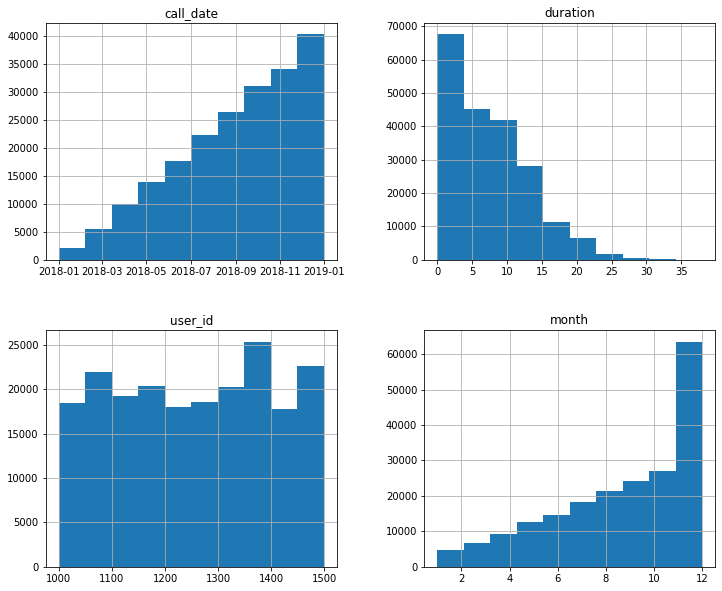

In [26]:
calls.hist(figsize=(12,10))
None

Ошибки и аномалии в таблице отсутствуют, столбец duration — длительность звонка в минутах, в пределах от 0 до 38 минут.

Таблица internet

In [27]:
internet.describe()

,Unnamed: 0,mb_used,user_id,month
count,149396.000000,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842,8.563315
std,43127.054745,278.300951,144.050823,2.788717
min,0.000000,0.000000,1000.000000,1.000000
25%,37348.750000,138.187500,1130.000000,7.000000
50%,74697.500000,348.015000,1251.000000,9.000000
75%,112046.250000,559.552500,1380.000000,11.000000
max,149395.000000,1724.830000,1499.000000,12.000000


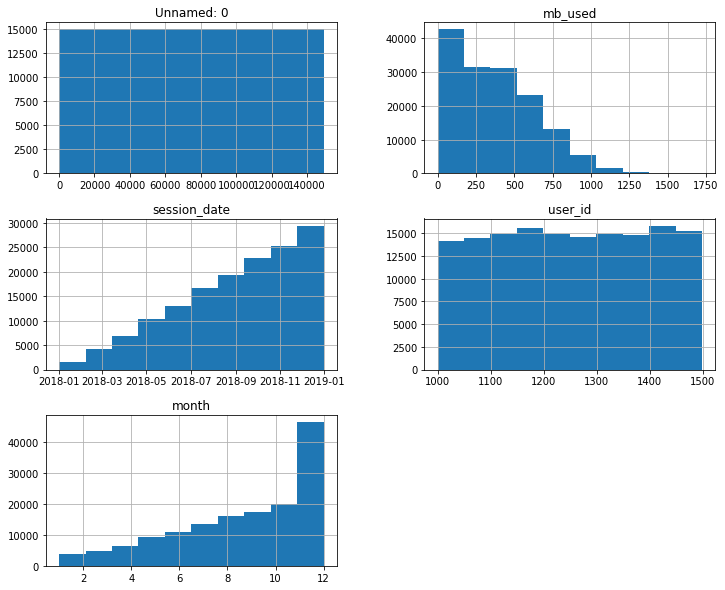

In [28]:
internet.hist(figsize=(12,10))
None

Ошибки и аномалии в таблице отсутствуют, столбец mb_used — объём потраченного за сессию интернет-трафика, в пределах от 0 до 1725 Мб.

Таблица messages

In [29]:
messages.describe()

,user_id,month
count,123036.000000,123036.000000
mean,1256.989410,8.632262
std,143.523967,2.747328
min,1000.000000,1.000000
25%,1134.000000,7.000000
50%,1271.000000,9.000000
75%,1381.000000,11.000000
max,1499.000000,12.000000


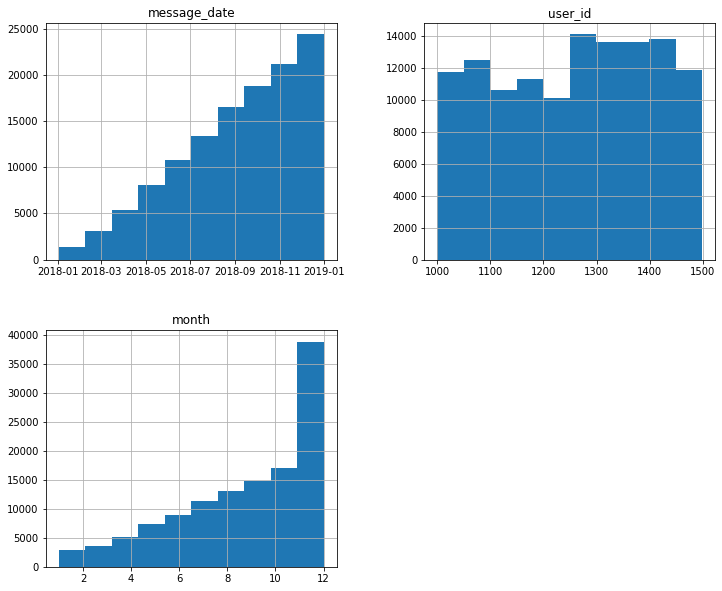

In [30]:
messages.hist(figsize=(12,10))
None

Ошибки и аномалии в таблице отсутствуют.

Таблица users

In [31]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


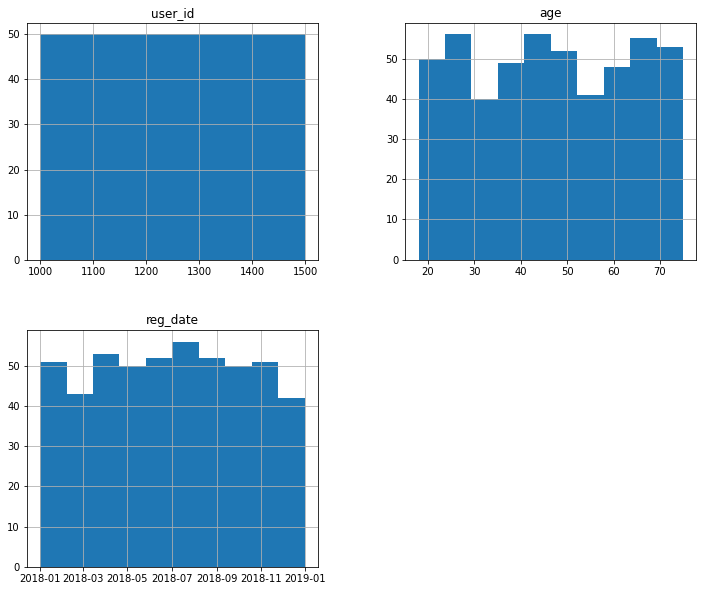

In [32]:
users.hist(figsize=(12,10))
None

Ошибки и аномалии в таблице отсутствуют, age — возраст пользователя в годах, в пределах от 18 до 75 лет.

Таблица tariffs

In [33]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице всего две строки, ошибки отсутствуют.

Сгруппируем таблицы calls, internet, messages по идентификатору пользователя и месяцу

In [34]:
calls_group = calls.groupby(['user_id', 'month']).agg({'duration': ['sum', 'count']}).reset_index()

In [35]:
calls_group.columns = ['user_id', 'month', 'duration', 'count_calls']

In [36]:
calls_group

,user_id,month,duration,count_calls
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


In [37]:
internet_group = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

In [38]:
messages_group = messages.groupby(['user_id', 'month'])['id'].count().reset_index()

In [39]:
messages_group = messages_group.rename(columns = {'id': 'messages'})

Объединим получившиеся таблицы между собой, а потом и с таблицами users и tariffs.

In [40]:
merge_df = calls_group.merge(internet_group, on=['user_id', 'month'], how = 'outer').merge(messages_group, on = ['user_id', 'month'], 
                                                                               how = 'outer').fillna(0)

In [41]:
merge_df

,user_id,month,duration,count_calls,mb_used,messages
0,1000,5,159.0,22.0,2253.49,22.0
1,1000,6,172.0,43.0,23233.77,60.0
2,1000,7,340.0,47.0,14003.64,75.0
3,1000,8,408.0,52.0,14055.93,81.0
4,1000,9,466.0,58.0,14568.91,57.0
...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11050.56,17.0
3210,1489,9,0.0,0.0,17206.30,32.0
3211,1489,10,0.0,0.0,19559.44,21.0
3212,1489,11,0.0,0.0,17491.56,20.0


In [42]:
report = merge_df.merge(users, on = 'user_id', how = 'left').merge(tariffs, left_on = 'tariff', 
                                                                 right_on = 'tariff_name', how = 'left')

In [43]:
report

,user_id,month,duration,count_calls,mb_used,messages,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,2253.49,22.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,43.0,23233.77,60.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,47.0,14003.64,75.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,52.0,14055.93,81.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,58.0,14568.91,57.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11050.56,17.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3210,1489,9,0.0,0.0,17206.30,32.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3211,1489,10,0.0,0.0,19559.44,21.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3212,1489,11,0.0,0.0,17491.56,20.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart


Округлим в большую сторону до гигабайта общую сумму интернет-трафика за месяц и добавим новую колонку в датафрейм.

In [44]:
report.insert(4, 'gb_used', (report['mb_used'] / 1024).apply(np.ceil))

In [45]:
report

,user_id,month,duration,count_calls,gb_used,mb_used,messages,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,3.0,2253.49,22.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,43.0,23.0,23233.77,60.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,47.0,14.0,14003.64,75.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,52.0,14.0,14055.93,81.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,58.0,15.0,14568.91,57.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11.0,11050.56,17.0,35,NaN,Санкт-Петербург,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3210,1489,9,0.0,0.0,17.0,17206.30,32.0,35,NaN,Санкт-Петербург,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3211,1489,10,0.0,0.0,20.0,19559.44,21.0,35,NaN,Санкт-Петербург,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3212,1489,11,0.0,0.0,18.0,17491.56,20.0,35,NaN,Санкт-Петербург,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart


Посчитаем помесячную выручку с каждого пользователя.

Составим функция для подсчёта выручки.

In [46]:
def calc_revenue(row):
    if row['tariff'] == 'ultra':
        sum = tariffs.loc[1, 'rub_monthly_fee'] # вот здесь будет браться значение из таблицы
        if row['duration'] > tariffs.loc[1, 'minutes_included']:
            calls = (row['duration'] - 3000 ) * 1
        else:
            calls = 0
        if row['messages'] > 1000:
            messages = (row['messages'] - 1000) * 1
        else:
            messages = 0
        if row['gb_used'] > 30:
            gb_used = (row['gb_used'] - 30) * 150
        else:
            gb_used = 0
        sum += calls + messages + gb_used
    elif row['tariff'] == 'smart':
        sum = 550
        if row['duration'] > 500:
            calls = (row['duration'] - 500) * 3
        else:
            calls = 0
        if row['messages'] > 50:
            messages = (row['messages'] - 50) * 3
        else:
            messages = 0
        if row['gb_used'] > 15:
            gb_used = (row['gb_used'] - 15) * 200
        else:
            gb_used = 0
        sum += calls + messages + gb_used
    return sum

Применим функцию calc_revenue для создания столбца с выручкой для каждого клиента.

In [47]:
report['revenue_client'] = report.apply(calc_revenue, axis=1)

In [50]:
report

,user_id,month,duration,count_calls,gb_used,mb_used,messages,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue_client
0,1000,5,159.0,22.0,3.0,2253.49,22.0,52,NaN,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6,172.0,43.0,23.0,23233.77,60.0,52,NaN,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7,340.0,47.0,14.0,14003.64,75.0,52,NaN,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8,408.0,52.0,14.0,14055.93,81.0,52,NaN,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9,466.0,58.0,15.0,14568.91,57.0,52,NaN,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11.0,11050.56,17.0,35,NaN,Санкт-Петербург,...,smart,50,15360,500,550,200,3,3,smart,550.0
3210,1489,9,0.0,0.0,17.0,17206.30,32.0,35,NaN,Санкт-Петербург,...,smart,50,15360,500,550,200,3,3,smart,950.0
3211,1489,10,0.0,0.0,20.0,19559.44,21.0,35,NaN,Санкт-Петербург,...,smart,50,15360,500,550,200,3,3,smart,1550.0
3212,1489,11,0.0,0.0,18.0,17491.56,20.0,35,NaN,Санкт-Петербург,...,smart,50,15360,500,550,200,3,3,smart,1150.0


### Вывод
Была проведена подготовка данных:
- Переведены в формат datetime данные с датой в таблицах: calls, messages, internet, users.  
- Добавлены в таблицы calls, messages, internet столбцы с месяцем даты звонка, даты сообщения и даты интернет-сессии соответственно.  
- Был проведен поиск ошибок в данных. Ошибки обнаружены не были.  
- Проведено объединение всех исходных таблиц в сводную таблицу report. 
- Добавлен новый столбец в свобную таблицу с общей суммой интернет-трафика за месяц.  
- Посчитана помесячная выручка с каждого пользователя, при помощи функции calc_revenue.

## Шаг 3. Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [51]:
pivot_stat = report.pivot_table(index=['tariff'], values=['duration', 'messages', 'gb_used'],
                                 aggfunc={'duration': ['mean', 'var', 'std'],
                                       'gb_used': ['mean', 'var', 'std'],
                                       'messages': ['mean', 'var', 'std']}).round(1)

In [52]:
pivot_stat

duration                  gb_used            messages              
           mean    std       var    mean  std   var     mean   std     var
tariff                                                                    
smart     417.9  190.3   36219.3    16.3  5.7  33.0     33.4  28.2   796.8
ultra     526.6  317.6  100873.6    19.5  9.9  97.1     49.4  47.8  2285.3

Построим гистограммы.

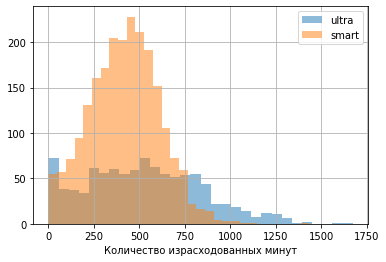

In [53]:
plt.hist(report.loc[report['tariff'] == 'ultra', 'duration'], alpha=0.5, bins=30, label='ultra')
plt.hist(report.loc[report['tariff'] == 'smart', 'duration'], alpha=0.5, bins=30, label='smart')
plt.grid()
plt.legend()
plt.xlabel('Количество израсходованных минут') 
plt.show()

In [54]:
report.loc[report['tariff'] == 'ultra', 'duration'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

In [55]:
report.loc[report['tariff'] == 'smart', 'duration'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

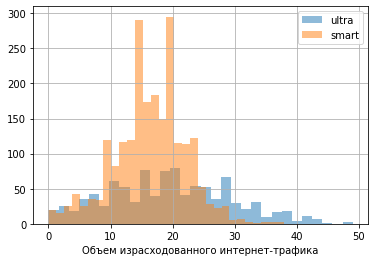

In [56]:
plt.hist(report.loc[report['tariff'] == 'ultra', 'gb_used'], alpha=0.5, bins=30, label='ultra')
plt.hist(report.loc[report['tariff'] == 'smart', 'gb_used'], alpha=0.5, bins=30, label='smart')
plt.grid()
plt.legend()
plt.xlabel('Объем израсходованного интернет-трафика') 
plt.show()

In [57]:
report.loc[report['tariff'] == 'ultra', 'gb_used'].describe()

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

In [58]:
report.loc[report['tariff'] == 'smart', 'gb_used'].describe()

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

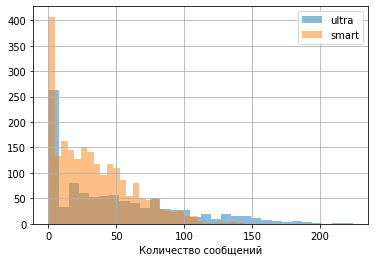

In [59]:
plt.hist(report.loc[report['tariff'] == 'ultra', 'messages'], alpha=0.5, bins=30, label='ultra')
plt.hist(report.loc[report['tariff'] == 'smart', 'messages'], alpha=0.5, bins=30, label='smart')
plt.grid()
plt.legend()
plt.xlabel('Количество сообщений') 
plt.show()

In [60]:
report.loc[report['tariff'] == 'ultra', 'messages'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

In [61]:
report.loc[report['tariff'] == 'smart', 'messages'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

Исходя из полученных данных, можно сделать следующие выводы.
- По количеству израсходованных минут среднее значение у пользователей тарифа "Ultra" (526,6) превышает среднее значение у пользователей тарифа "Smart" (418). Среднее значение у пользователей тарифа "Smart" укладывается в лимитное в 500 минут. У пользователей тарифа "Ultra" до лимитного значения в 3000 минут не дошёл никто.
- По объёму израсходанного интернет-трафика среднее значение у пользователей тарифа "Ultra" (19,5) превышает среднее значение у пользователей тарифа "Smart" (16,3). Среднее значение у пользователей тарифа "Smart" 16,3 превышает лимитное значение в 15 Гб, что значит в среднем, пользователям данного тарифа не хватает лимитного  интернет-траффика на месяц.
- По количеству сообщений среднее значение у пользователей тарифа "Ultra" (49) бодьше, чем среднее значение у пользователей тарифа "Smart" (33). Лимит в 1000 сообщений из пользователей тарифа "Ultra" не израсходовал никто, максимальное - 224. У пользователей тарифа "Smart" среднее значение, в 33 сообщения, приближается к лимитному в 50 сообщений.  
- Пользователи тарифа "Smart" в среднем не превышают лимитных значений своего тарифа, чтобы не нести дополнительные расходы. А у пользователей тарифа "Ultra" никто не использует свой тариф по максимуму.



## Шаг 4. Проверка гипотез

### Первая гипотеза

- Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.  

Сформулируем нулевую H0 и альтернативную H1 гипотезы:  

H0 — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».  
H1 — средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт».  
α = 0.05

Применим метод scipy.stats.ttest_ind (array1, array2, equal_var) для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам 

In [62]:
data_smart = report.loc[report['tariff'] == 'smart', 'revenue_client']

In [63]:
data_ultra = report.loc[report['tariff'] == 'ultra', 'revenue_client']

In [64]:
alpha = 0.05

In [65]:
results = st.ttest_ind(
    data_smart, 
    data_ultra)

In [66]:
results

Ttest_indResult(statistic=-28.611056741704818, pvalue=1.4229814360764067e-160)

In [67]:
print('p-значение: ', results.pvalue)

p-значение:  1.4229814360764067e-160


In [68]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


Следовательно, принимаем альтернативную гипотезу, что средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт».

In [69]:
mean_revenue_ultra = report.loc[report['tariff'] == 'ultra', 'revenue_client'].mean()

In [70]:
mean_revenue_smart = report.loc[report['tariff'] == 'smart', 'revenue_client'].mean()

In [71]:
mean_revenue_ultra , mean_revenue_smart

(2070.1522842639592, 1289.9735307312696)

In [72]:
print('Средняя выручка пользователей тарифа «Ультра»', mean_revenue_ultra.round(1))
print('Средняя выручка пользователей тарифа «Смарт»', mean_revenue_smart.round(1))

Средняя выручка пользователей тарифа «Ультра» 2070.2
Средняя выручка пользователей тарифа «Смарт» 1290.0


Среднее значение выручки пользователей тарифа «Ультра» больше среднего значения выручки пользователей тарифа «Смарт» примерно на 62%. 

### Вторая гипотеза

- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 

Сформулируем нулевую H0 и альтернативную H1 гипотезы:  
H0 — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.  
H1 — средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.  
α = 0.05

Применим метод scipy.stats.ttest_ind (array1, array2, equal_var) для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [73]:
data_moscow = report.loc[report['city'] == 'Москва', 'revenue_client']

In [74]:
data_not_moscow = report.loc[report['city'] != 'Москва', 'revenue_client']

In [75]:
alpha = 0.05

In [76]:
results = st.ttest_ind(
    data_moscow, 
    data_not_moscow)

In [77]:
results

Ttest_indResult(statistic=0.606816942705698, pvalue=0.5440152911670224)

In [78]:
print('p-значение: ', results.pvalue)

p-значение:  0.5440152911670224


In [79]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Не получилось отвергнуть нулевую гипотезу


In [80]:
mean_revenue_moscow = report.loc[report['city'] == 'Москва', 'revenue_client'].mean()

In [81]:
mean_revenue_not_moscow = report.loc[report['city'] != 'Москва', 'revenue_client'].mean()

In [82]:
print('Средняя выручка с пользователей из Москвы', mean_revenue_moscow.round(1))
print('Средняя выручка с пользователей не из Москвы', mean_revenue_not_moscow.round(1))

Средняя выручка с пользователей из Москвы 1546.7
Средняя выручка с пользователей не из Москвы 1524.9


Средние значения выручек пользователей из Москвы и пользователей не из Москвы, не сильно отличаются, что подтверджает нулевую гипотезу.

## Общий вывод

Был проведен анализ двух тарифных планов: «Смарт» и «Ультра». 
Была проведена подготовка данных и было рассчитано для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.    

В ходе дальнейшего анализа данных было изучено сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. По этим данным был сделан вывод, что пользователи тарифа "Smart" в среднем не превышают лимитных значений своего тарифа, чтобы не нести дополнительные расходы. А пакет услуг тарифа "Ultra" оказался избыточным. Отсутствуют пользователи, которые превышали лимитные значения по услугам тарифа. 

Далее с помощью T-теста были проверены две гитотезы:

- Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.  
Нулевая гипотеза была отвергнута и принята альтернативная гипотеза, что средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт».
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.   
Нулевую гипотезу, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов   отвергнуть не удалось.

Также была рассчитана средняя выручка по пользователям тарифа «Ультра», равная 2070.2 руб. и средняя выручка по пользователям тарифа «Смарт», равная 1290.0 руб. Исходя из этого, делаем вывод, что тариф "Ультра" приносит компании приносит больше денег и более ей выгоден.